# **Evaluacion de Data set**
Tecnicatura en inteligencia artificial

Universidad Nacional de Hurlingham

Docente: Andrea Rey

Alumno : Nicolas Seivane

Librerias que voy a utilizar


In [1]:
import pandas as pd
import sklearn as sk
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    log_loss,
    cohen_kappa_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold


# .head()
# .info()
# .isnull().any()
# df.column.value_counts()
# .max()
# .min()
# .describe()

In [2]:
datos = pd.read_csv("C:\\Users\\User\\Documents\\Proyecto integrador\\cardiografia\\cardiotocography.csv")

datos.drop_duplicates(inplace=True)
datos.dropna(inplace=True)
datos.drop(columns=["CLASS"], inplace=True)
datos['NSP'] = datos['NSP'].replace({1: 'Normal', 2: 'Sospechoso', 3: 'Patologico'})
datos.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,Sospechoso
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,Normal
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,Normal
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,Normal
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,Normal


In [3]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2115 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2115 non-null   int64  
 1   AC        2115 non-null   float64
 2   FM        2115 non-null   float64
 3   UC        2115 non-null   float64
 4   DL        2115 non-null   float64
 5   DS        2115 non-null   float64
 6   DP        2115 non-null   float64
 7   ASTV      2115 non-null   int64  
 8   MSTV      2115 non-null   float64
 9   ALTV      2115 non-null   int64  
 10  MLTV      2115 non-null   float64
 11  Width     2115 non-null   int64  
 12  Min       2115 non-null   int64  
 13  Max       2115 non-null   int64  
 14  Nmax      2115 non-null   int64  
 15  Nzeros    2115 non-null   int64  
 16  Mode      2115 non-null   int64  
 17  Mean      2115 non-null   int64  
 18  Median    2115 non-null   int64  
 19  Variance  2115 non-null   int64  
 20  Tendency  2115 non-null   int64  
 

In [4]:
datos.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,...,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,133.301655,0.003186,0.009508,0.004385,0.001899,0.000003,0.000159,46.977778,1.335035,9.789598,...,70.511111,93.574468,164.085579,4.075650,0.325296,137.448227,134.596217,138.084161,18.891726,0.318676
std,9.836399,0.003870,0.046783,0.002941,0.002965,0.000057,0.000591,17.180933,0.884111,18.329675,...,38.997589,29.550040,17.943983,2.951027,0.707507,16.398956,15.607096,14.476729,29.029413,0.611005
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [5]:
n_filas = len(datos)

for column in datos.columns:
    unicos = datos[column].unique()
    n_unicos = len(unicos)
    
    # Si es categórica (tipo object/category) o es numérica con pocos únicos
    if (datos[column].dtype == 'object') or (len(unicos) <= 10):
        print(f"\nColumna '{column}' (candidata categórica): {n_unicos} valores únicos")
        
        
        for unico in unicos:
                count = len(datos[datos[column] == unico])
                normalizado = count / n_filas
                print(f"   Hay {normalizado:.2%} codificado en {unico}")
    else:
        print(f"\nColumna '{column}' tiene media: {datos[column].mean():.2f}, valor maximo: {datos[column].max():.2f} y valor minimo: {datos[column].min():.2f}")


Columna 'LB' tiene media: 133.30, valor maximo: 160.00 y valor minimo: 106.00

Columna 'AC' tiene media: 0.00, valor maximo: 0.02 y valor minimo: 0.00

Columna 'FM' tiene media: 0.01, valor maximo: 0.48 y valor minimo: 0.00

Columna 'UC' tiene media: 0.00, valor maximo: 0.01 y valor minimo: 0.00

Columna 'DL' tiene media: 0.00, valor maximo: 0.01 y valor minimo: 0.00

Columna 'DS' (candidata categórica): 2 valores únicos
   Hay 99.67% codificado en 0.0
   Hay 0.33% codificado en 0.001

Columna 'DP' (candidata categórica): 6 valores únicos
   Hay 91.58% codificado en 0.0
   Hay 3.40% codificado en 0.002
   Hay 1.13% codificado en 0.003
   Hay 3.31% codificado en 0.001
   Hay 0.43% codificado en 0.004
   Hay 0.14% codificado en 0.005

Columna 'ASTV' tiene media: 46.98, valor maximo: 87.00 y valor minimo: 12.00

Columna 'MSTV' tiene media: 1.34, valor maximo: 7.00 y valor minimo: 0.20

Columna 'ALTV' tiene media: 9.79, valor maximo: 91.00 y valor minimo: 0.00

Columna 'MLTV' tiene media:

In [6]:
for column in datos.columns:
    if len(datos[column].unique()) <= 10 and datos[column].dtype == 'object':
        print(column, datos[column].unique())



NSP ['Sospechoso' 'Normal' 'Patologico']


In [7]:
for column in datos.columns:
    if len(datos[column].unique()) <= 10 and datos[column].dtype == 'object':
        unicos = datos[column].unique()
        for i in range(len(unicos)):
            datos[column] = datos[column].replace({unicos[i]: i})
        print(column, datos[column].unique())

NSP [0 1 2]


C:\Users\User\AppData\Local\Temp\ipykernel_14080\495973239.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[column] = datos[column].replace({unicos[i]: i})


In [8]:
for column in datos.columns:
    if len(datos[column].unique()) > 4:
        datos[column] = (datos[column] - datos[column].mean()) / datos[column].std()

In [9]:
atributos = datos.columns[:-1]
concepto = datos.columns[-1]

datos.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,-1.352289,-0.823286,-0.203244,-1.491038,-0.640624,0.0,-0.269439,1.514599,-0.944491,1.811838,...,-1.068508,-2.122471,-0.703365,-0.459777,-1.063984,0.154019,-1.180112,1.863912,1,0
1,-0.132330,0.727018,-0.203244,0.549212,0.371265,0.0,-0.269439,-1.744828,0.865236,-0.534085,...,-0.865463,1.890016,0.652095,0.953637,0.216585,0.089945,0.132339,-0.237405,0,1
2,-0.030667,-0.048134,-0.203244,1.229295,0.371265,0.0,-0.269439,-1.803032,0.865236,-0.534085,...,-0.865463,1.890016,0.313230,0.953637,0.216585,0.025872,-0.005814,-0.202957,0,1
3,0.070996,-0.048134,-0.203244,1.229295,0.371265,0.0,-0.269439,-1.803032,1.204559,-0.534085,...,-1.373077,0.329605,2.346420,-0.459777,-0.027333,-0.038202,-0.074890,-0.202957,1,1
4,-0.132330,0.985402,-0.203244,1.229295,-0.640624,0.0,-0.269439,-1.803032,1.204559,-0.534085,...,-1.373077,0.329605,1.668690,-0.459777,-0.027333,0.089945,-0.005814,-0.271853,1,1


In [ ]:
def validacion_cruzada(conjunto, atributos, concepto, k=5, random=False, agregar_unos=False, undersample=False, oversample=False):
  
  if undersample:
    cantidad_menor_concepto = conjunto[concepto].value_counts().min()
    conjunto = pd.concat([conjunto[conjunto[concepto] == valor].sample(n=cantidad_menor_concepto, random_state=42) for valor in conjunto[concepto].unique()])

  if oversample:
    cantidad_mayor_concepto = conjunto[concepto].value_counts().max()
    conjunto = pd.concat([conjunto[conjunto[concepto] == valor].sample(n=cantidad_mayor_concepto, replace=True, random_state=42) for valor in conjunto[concepto].unique()])

  if random: conjunto = conjunto.sample(frac=1, random_state=11).reset_index(drop=True)

  x = conjunto[atributos]
  if agregar_unos: x.insert(0, "Unos", 1)

  y = conjunto[concepto]

  resultados = []
  skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

  for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        resultados.append((x_train, y_train, x_test, y_test))

  return resultados

from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(
    n_estimators=100,      # número de árboles en el bosque
    criterion="gini",      # función de calidad de la división ("gini" o "entropy")
    max_depth=None,        # profundidad máxima de cada árbol
    min_samples_split=2,   # min muestras para dividir un nodo
    min_samples_leaf=1,    # min muestras en una hoja
    max_features="sqrt",   # nº de features a considerar en cada split ("sqrt", "log2", None)
    bootstrap=True,        # si usar bootstrap samples para entrenar cada árbol
    random_state=42,       # semilla
    n_jobs=-1              # usa todos los cores
)

from sklearn.naive_bayes import GaussianNB

GaussianNB(
    var_smoothing=1e-9     # suavizado para evitar divisiones por cero
)


from sklearn.svm import SVC

SVC(
    C=1.0,                 # penalización del error (mayor C = menos margen, más sobreajuste)
    kernel="rbf",          # kernel: "linear", "poly", "rbf", "sigmoid"
    degree=3,              # grado del polinomio (si kernel="poly")
    gamma="scale",         # controla la influencia de un solo ejemplo ("scale", "auto" o un valor numérico)
    probability=True,     # si calcular probabilidades (más lento)
    random_state=42
)

from sklearn.linear_model import LogisticRegression

LogisticRegression(
    penalty="l2",          # regularización: "l1", "l2", "elasticnet", None
    C=1.0,                 # inverso de la fuerza de regularización (menor C = más regularización)
    solver="lbfgs",        # optimizador ("lbfgs", "saga", "liblinear", "newton-cg")
    max_iter=1000,         # iteraciones máximas (importante en datasets grandes)
    multi_class="multinomial",    # "ovr" (uno-vs-rest) o "multinomial"
    random_state=42
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    log_loss,
    cohen_kappa_score
)

    y_true_total.extend(y_test)
    y_pred_total.extend(y_pred)

print("Matriz de confusión total:\n", confusion_matrix(y_true_total, y_pred_total))

LogisticRegression(
    penalty="l2",          # regularización: "l1", "l2", "elasticnet", None
    C=1.0,                 # inverso de la fuerza de regularización (menor C = más regularización)
    solver="lbfgs",        # optimizador ("lbfgs", "saga", "liblinear", "newton-cg")
    max_iter=1000,         # iteraciones máximas (importante en datasets grandes)
    multi_class="multinomial",    # "ovr" (uno-vs-rest) o "multinomial"
    random_state=42
)

# *Regresion Logistica*

In [ ]:
grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1","l2","elasticnet", None],  # 'l1' si usas solver='liblinear' o 'saga'
    "solver": ["lbfgs","saga", "newton-cg"],# según el penalty que uses, liblinear no soporta None, newton-cg no soporta l1 ni elasticnet
    "multi_class": ["ovr", "multinomial"] # si es multiclass
}
 
## cohen_kappa_score,     accuracy_score,    precision_score,     recall_score,    f1_score,    roc_auc_score,


#with open("regresion_logistica_resultados.txt", "w") as f:
with open("regresion_logistica_resultados_Cardiotocografia.txt", "w") as f:
    f.write("Resultados de Regresion Logistica con validacion cruzada (5 folds):\n")
    
    for C in grid["C"]:

        for penalty in grid["penalty"]:
            for multi_class in grid["multi_class"]:
                for solver in grid["solver"]:
                    # chequeo de compatibilidad
                    if penalty == "l1" and solver not in ["liblinear", "saga"]:
                        continue
                    if penalty == "elasticnet" and solver != "saga":
                        continue
                    if penalty is None and solver not in ["lbfgs","newton-cg","sag","saga"]:
                        continue
                    if penalty is None and solver not in ["lbfgs","newton-cg","sag","saga"]:
                        continue
                    scoring_funcs = {
                                "cohen_kappa": 0,
                                "accuracy": 0,
                                "precision": 0,
                                "recall": 0,
                                "f1": 0,
                                "roc_auc": 0
                            }
                    try:
                        inicio = time.time()
                        modelo = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            l1_ratio=0.5 if penalty=="elasticnet" else None,
                            multi_class=multi_class,
                            max_iter=1000,
                            random_state=42
                        )

                        folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)
                        
                        for x_train, y_train, x_test, y_test in folds:
                                modelo.fit(x_train, y_train)
                                pred = modelo.predict(x_test)
                                scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                probs = modelo.predict_proba(x_test)
                                scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                
                        fin = time.time()
                        tiempo_total = fin - inicio
                        for key in scoring_funcs:
                            scoring_funcs[key] /= len(folds) 
                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                    except Exception as e:
                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de Regresion Logistica con validacion cruzada (5 folds) undersample:\n")
    
    for C in grid["C"]:

        for penalty in grid["penalty"]:
            for solver in grid["solver"]:
                for multi_class in grid["multi_class"]:
                    # chequeo de compatibilidad
                    if penalty == "l1" and solver not in ["liblinear", "saga"]:
                        continue
                    if penalty == "elasticnet" and solver != "saga":
                        continue
                    if penalty is None and solver not in ["lbfgs","newton-cg","sag","saga"]:
                        continue
                    scoring_funcs = {
                                "cohen_kappa": 0,
                                "accuracy": 0,
                                "precision": 0,
                                "recall": 0,
                                "f1": 0,
                                "roc_auc": 0
                            }
                    try:
                        tiempo_inicio = time.time()
                        modelo = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            l1_ratio=0.5 if penalty=="elasticnet" else None,
                            multi_class=multi_class,
                            max_iter=1000,
                            random_state=42
                        )

                        folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                        for x_train, y_train, x_test, y_test in folds:
                                modelo.fit(x_train, y_train)
                                pred = modelo.predict(x_test)
                                scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                probs = modelo.predict_proba(x_test)
                                scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")


                        fin = time.time()
                        tiempo_total = fin - tiempo_inicio
                        for key in scoring_funcs:
                            scoring_funcs[key] /= len(folds)  # Promediar las métricas

                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                    except Exception as e:
                        f.write(f"\nC={C}, penalty={penalty}, solver={solver}, multi_class={multi_class} --> ERROR: {str(e)}\n")

RandomForestClassifier(
    n_estimators=100,      # número de árboles en el bosque
    criterion="gini",      # función de calidad de la división ("gini" o "entropy")
    max_depth=None,        # profundidad máxima de cada árbol
    min_samples_split=2,   # min muestras para dividir un nodo
    min_samples_leaf=1,    # min muestras en una hoja
    max_features="sqrt",   # nº de features a considerar en cada split ("sqrt", "log2", None)
    bootstrap=True,        # si usar bootstrap samples para entrenar cada árbol
    random_state=42,       # semilla
    n_jobs=-1              # usa todos los cores
)


# *Random Forest*

In [ ]:
grid = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}



#with open("Random_forest.txt", "w") as f:
with open("Random_forest_Cardiotocografia.txt", "w") as f:
    f.write("Resultados de Random Forest con validacion cruzada (5 folds):\n")

    for criterion in grid["criterion"]:
        for max_depth in grid["max_depth"]:
            for min_samples_split in grid["min_samples_split"]:
                for min_samples_leaf in grid["min_samples_leaf"]:
                    for max_features in grid["max_features"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = RandomForestClassifier(
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=42
                            )

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase → usar esquema OVR
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} "
                                    f"--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")
                        except Exception as e:
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} --> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de Random Forest con validacion cruzada (5 folds) undersample:\n")
    
    for criterion in grid["criterion"]:
        for max_depth in grid["max_depth"]:
            for min_samples_split in grid["min_samples_split"]:
                for min_samples_leaf in grid["min_samples_leaf"]:
                    for max_features in grid["max_features"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = RandomForestClassifier(
                                criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=42
                            )

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase → usar esquema OVR
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} "
                                    f"--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")
                        except Exception as e:
                            f.write(f"\ncriterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}, "
                                    f"min_samples_leaf={min_samples_leaf}, max_features={max_features} --> ERROR: {str(e)}\n")

GaussianNB(
    var_smoothing=1e-9     # suavizado para evitar divisiones por cero
)


# *Naive Bayes*

In [ ]:
grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

#with open("Naiva_Bayes.txt", "w") as f:
with open("Naiva_Bayes_Cardiotocografia.txt", "w") as f:
    f.write("Resultados de Naive Bayes con validacion cruzada (5 folds):\n")

    for var_smoothing in grid["var_smoothing"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = GaussianNB(var_smoothing=var_smoothing)

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\n var_smoothing={var_smoothing}--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\n var_smoothing={var_smoothing}--> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de Naive Bayes con validacion cruzada (5 folds) undersample:\n")

    for var_smoothing in grid["var_smoothing"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = GaussianNB(var_smoothing=var_smoothing)
                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)
                                    if len(set(y_test)) == 2:
                                        # binaria → prob de la clase positiva
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\n var_smoothing={var_smoothing}--> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\n var_smoothing={var_smoothing}--> ERROR: {str(e)}\n")

SVC(
    C=1.0,                 # penalización del error (mayor C = menos margen, más sobreajuste)
    kernel="rbf",          # kernel: "linear", "poly", "rbf", "sigmoid"
    degree=3,              # grado del polinomio (si kernel="poly")
    gamma="scale",         # controla la influencia de un solo ejemplo ("scale", "auto" o un valor numérico)
    probability=True,     # si calcular probabilidades (más lento)
    random_state=42
)


# *SVM*

In [ ]:
grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 15, 20, 25],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],
    "degree": [2,3,4,5,6,7,8,9,10]
}

#with open("SVM.txt", "w") as f:
with open("SVM_Cardiotocografia.txt", "w") as f:
    f.write("Resultados de SVM con validacion cruzada (5 folds):\n")

    for C in grid["C"]:
        for kernel in grid["kernel"]:
            for gamma in grid["gamma"]:
                degrees_to_use = grid["degree"] if kernel == "poly" else [3]
                for degree in degrees_to_use:
                        scoring_funcs = {
                                "cohen_kappa": 0,
                                 "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = SVC(
                                  C=C,
                                    kernel=kernel,
                                    gamma=gamma,
                                    degree=degree,
                                    max_iter=1000,
                                    random_state=42,
                                    probability=True
                            )

                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)

                                    if len(set(y_test)) == 2:
                                        # binaria
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\nC={C}, kernel={kernel}, gamma={gamma}, degree={degree} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\nC={C}, kernel={kernel}, gamma={gamma}, degree={degree} --> ERROR: {str(e)}\n")
    f.write("\n\n")
    f.write("------------------------------------------------------\n\n")
    f.write("Resultados de SVM con validacion cruzada (5 folds) undersample:\n")

    for C in grid["C"]:
        for kernel in grid["kernel"]:
            for gamma in grid["gamma"]:
                if kernel != "poly" and "degree" in grid:
                    continue
                for degree in grid["degree"]:
                        scoring_funcs = {
                                    "cohen_kappa": 0,
                                    "accuracy": 0,
                                    "precision": 0,
                                    "recall": 0,
                                    "f1": 0,
                                    "roc_auc": 0
                                }
                        try:
                            inicio = time.time()
                            modelo = SVC(
                                  C=C,
                                    kernel=kernel,
                                    gamma=gamma,
                                    degree=degree if kernel=="poly" else None,
                                    max_iter=1000,
                                    random_state=42,
                                    probability=True
                            )
                            folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True, undersample=True)

                            for x_train, y_train, x_test, y_test in folds:
                                    modelo.fit(x_train, y_train)
                                    pred = modelo.predict(x_test)
                                    scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                                    scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                                    scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                                    scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                                    scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                                    probs = modelo.predict_proba(x_test)

                                    if len(set(y_test)) == 2:
                                        # binaria
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                                    else:
                                        # multiclase
                                        scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

                                    
                            fin = time.time()
                            tiempo_total = fin - inicio
                            for key in scoring_funcs:
                                scoring_funcs[key] /= len(folds) 
                            f.write(f"\nC={C}, C={C}, gamma={gamma}, degree={degree} --> {scoring_funcs}, tiempo_total={tiempo_total:.2f} segundos\n")

                        except Exception as e:
                            f.write(f"\nC={C}, C={C}, gamma={gamma}, degree={degree} --> ERROR: {str(e)}\n")

In [10]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# Best Logistic Regression model based on the provided information
# Using C=10, penalty='l2', solver='lbfgs', multi_class='ovr' as an example from the best options
best_lr_model = LogisticRegression(C=10, penalty='l2', solver='lbfgs', multi_class='ovr', max_iter=1000, random_state=42)
best_lr_model.fit(datos[atributos], datos[concepto])
print("Best Logistic Regression Model Fitted")


# Best SVM model based on the provided information
best_svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42, probability=True)
best_svm_model.fit(datos[atributos], datos[concepto])
print("Best SVM Model Fitted")

# Best Gaussian Naive Bayes model based on the provided information
best_gnb_model = GaussianNB(var_smoothing=1e-9) # Using the default/any smoothing as indicated
best_gnb_model.fit(datos[atributos], datos[concepto])
print("Best Gaussian Naive Bayes Model Fitted")

# Best Random Forest model based on the provided information
# Using criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt' as an example from the best options
best_rf_model = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
best_rf_model.fit(datos[atributos], datos[concepto])
print("Best Random Forest Model Fitted")


with open("Importancia_corazon.txt", "w") as f:
    f.write("La importancia de las features:\n")

    f.write("Random Forest Importancia atributos:")
    feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=atributos)
    f.write(str(feature_importances_rf.sort_values(ascending=False)))
    f.write("-" * 30)


    f.write("Logistic Regression Importancia Permutacion:")
    result_lr = permutation_importance(best_lr_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
    feature_importances_lr = pd.Series(result_lr.importances_mean, index=atributos)
    f.write(str(feature_importances_lr.sort_values(ascending=False)))
    f.write("-" * 30)

    f.write("SVM Importancia Permutacion:")
    result_svm = permutation_importance(best_svm_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
    feature_importances_svm = pd.Series(result_svm.importances_mean, index=atributos)
    f.write(str(feature_importances_svm.sort_values(ascending=False)))
    f.write("-" * 30)

    f.write("Gaussiano Naive Bayes Importancia Permutacion:")
    result_gnb = permutation_importance(best_gnb_model, datos[atributos], datos[concepto], n_repeats=10, random_state=42, n_jobs=-1)
    feature_importances_gnb = pd.Series(result_gnb.importances_mean, index=atributos)
    f.write(str(feature_importances_gnb.sort_values(ascending=False)))
    f.write("-" * 30)

    f.write("Logistic Regression Feature Importance (Absolute Coefficients):")

    if not hasattr(best_lr_model, 'coef_'):
        best_lr_model.fit(datos[atributos], datos[concepto])

    feature_importances_lr_coef = pd.Series(np.abs(best_lr_model.coef_[0]), index=atributos)
    f.write(str(feature_importances_lr_coef.sort_values(ascending=False)))
    f.write("-" * 30)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Logistic Regression Model Fitted
Best SVM Model Fitted
Best Gaussian Naive Bayes Model Fitted
Best Random Forest Model Fitted


In [11]:
import matplotlib.pyplot as plt

def plot_feature_importance(series, title):
    series_sorted = series.sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(series_sorted.index, series_sorted.values)
    plt.title(title)
    plt.xlabel("Importancia")
    plt.ylabel("Atributo")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

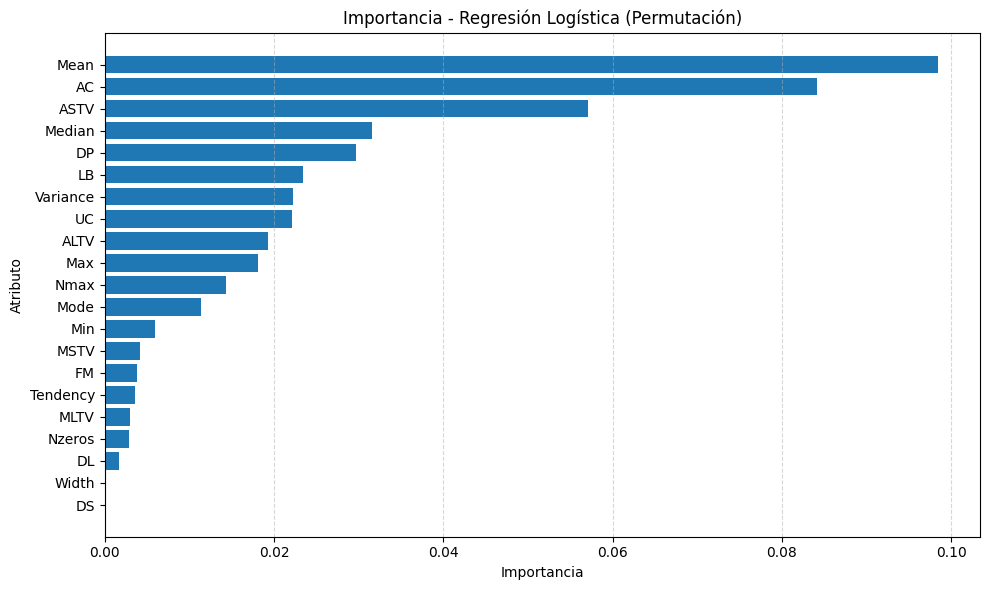

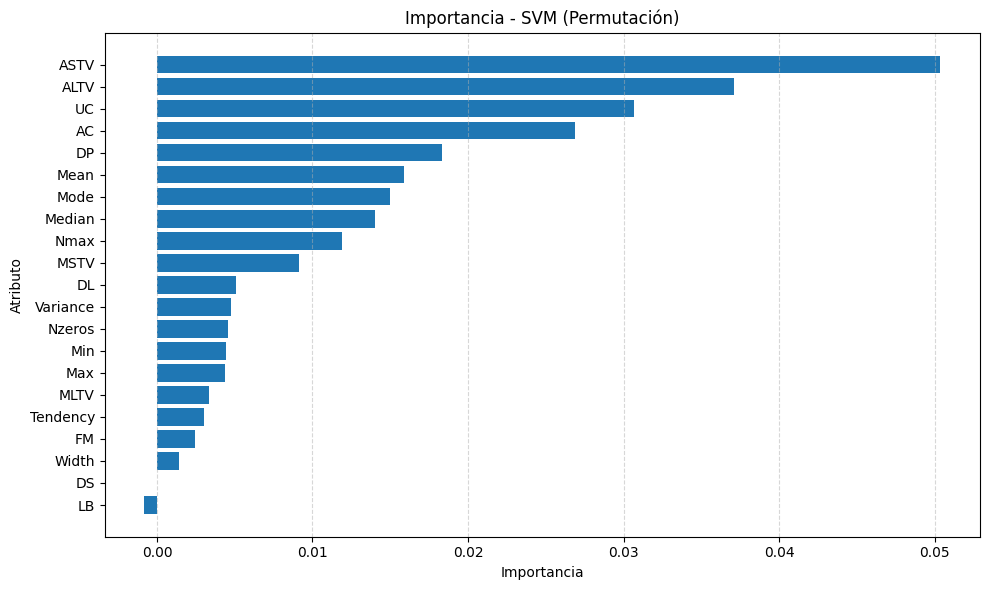

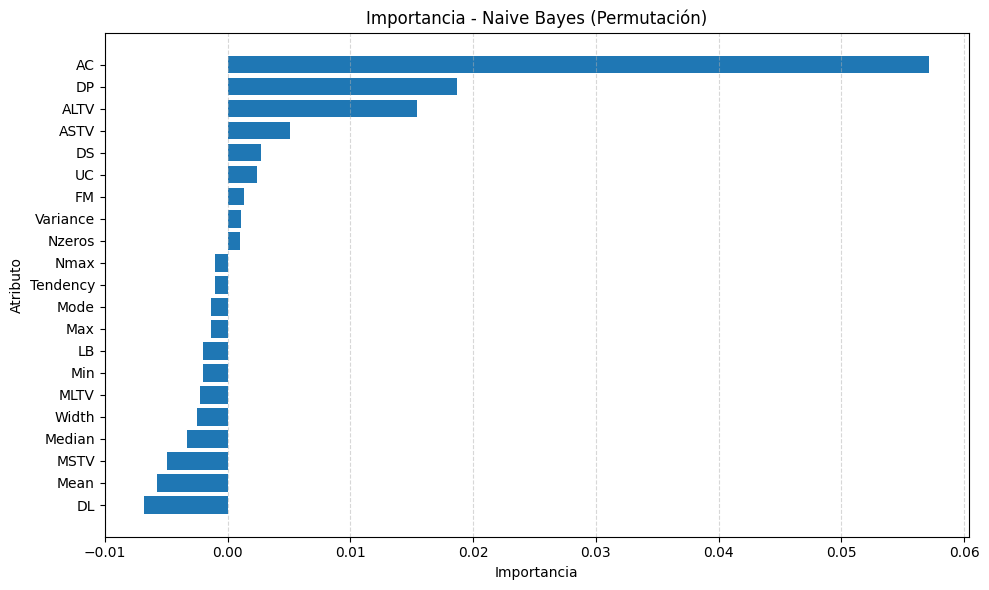

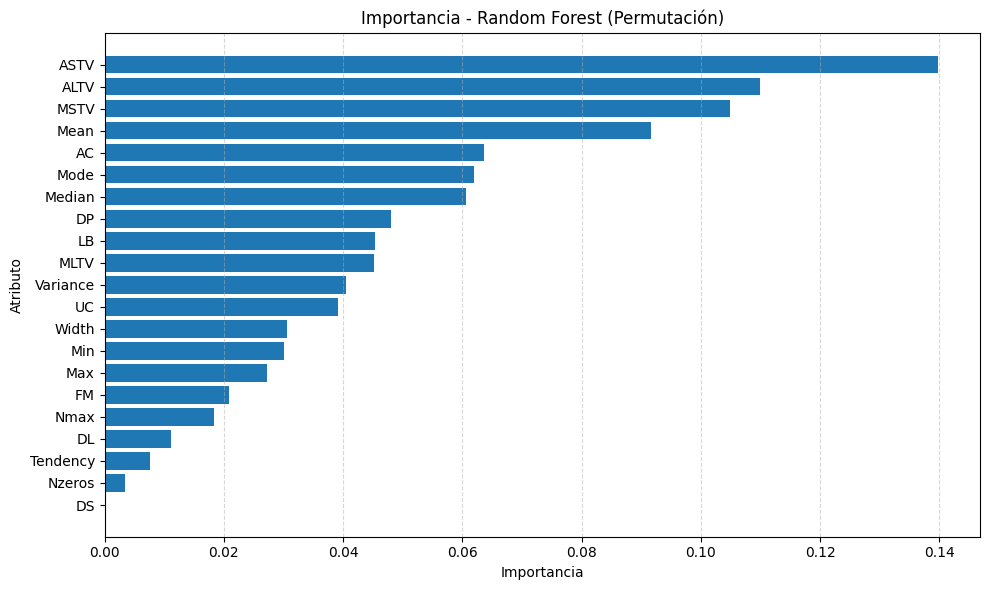

In [12]:
plot_feature_importance(feature_importances_lr, "Importancia - Regresión Logística (Permutación)")
plot_feature_importance(feature_importances_svm, "Importancia - SVM (Permutación)")
plot_feature_importance(feature_importances_gnb, "Importancia - Naive Bayes (Permutación)")
plot_feature_importance(feature_importances_rf, "Importancia - Random Forest (Permutación)")

In [27]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time


concepto = datos.columns[-1]

atributos = []

# The original code was trying to iterate over a pandas Series as if it were a list of strings.
# We need to iterate over the index of the Series to get the attribute names.
with open("Logistic_Regression_resultados_Cardiotocografia_atributos.txt", "w") as f:
    f.write("Resultados de Regresion Logistica con validacion cruzada (5 folds) con seleccion de atributos:\n")
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_lr.index:
      atributos += [atributo]

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      folds = validacion_cruzada(datos, atributos, concepto, k=5, random=True)

      for x_train, y_train, x_test, y_test in folds:
                  best_lr_model.fit(x_train, y_train)
                  pred = best_lr_model.predict(x_test)
                  scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                  scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                  scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                  scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                  scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                  probs = best_lr_model.predict_proba(x_test)
                  if len(set(y_test)) == 2:
                      # binaria
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                  else:
                      # multiclase
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n")
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.w

  Average Metrics with attributes ['LB']: {'cohen_kappa': 0.020112851145486575, 'accuracy': 0.7721040189125296, 'precision': 0.6467027240627166, 'recall': 0.7721040189125296, 'f1': 0.6882039515535867, 'roc_auc': 0.6732955725424616}
  Total Time: 0.33 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

  Average Metrics with attributes ['LB', 'AC']: {'cohen_kappa': 0.3266317688850653, 'accuracy': 0.808983451536643, 'precision': 0.7301339523829131, 'recall': 0.808983451536643, 'f1': 0.7638638415868833, 'roc_auc': 0.8409109902358018}
  Total Time: 0.21 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM']: {'cohen_kappa': 0.3550184624732301, 'accuracy': 0.8141843971631205, 'precision': 0.7984576473624013, 'recall': 0.8141843971631205, 'f1': 0.7764759107921277, 'roc_auc': 0.8449567294384742}
  Total Time: 0.22 seconds
  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC']: {'cohen_kappa': 0.41741328875940964, 'accuracy': 0.825531914893617, 'precision': 0.8130482705767147, 'recall': 0.825531914893617, 'f1': 0.791689078358605, 'roc_auc': 0.8546731680679629}
  Total Time: 0.20 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL']: {'cohen_kappa': 0.4138338404973875, 'accuracy': 0.8212765957446807, 'precision': 0.7903262926992689, 'recall': 0.8212765957446807, 'f1': 0.789188990716118, 'roc_auc': 0.8683982882295277}
  Total Time: 0.23 seconds
  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS']: {'cohen_kappa': 0.4138338404973875, 'accuracy': 0.8212765957446807, 'precision': 0.7903262926992689, 'recall': 0.8212765957446807, 'f1': 0.789188990716118, 'roc_auc': 0.8683982882295277}
  Total Time: 0.18 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP']: {'cohen_kappa': 0.5593412231399812, 'accuracy': 0.8543735224586289, 'precision': 0.8449276009756893, 'recall': 0.8543735224586289, 'f1': 0.8445147285925916, 'roc_auc': 0.9240753518150437}
  Total Time: 0.29 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV']: {'cohen_kappa': 0.605981178876806, 'accuracy': 0.8657210401891253, 'precision': 0.8574721624355339, 'recall': 0.8657210401891253, 'f1': 0.8592342728088715, 'roc_auc': 0.9456698773762765}
  Total Time: 0.28 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV']: {'cohen_kappa': 0.6081500926359913, 'accuracy': 0.8657210401891252, 'precision': 0.8581111103415457, 'recall': 0.8657210401891252, 'f1': 0.859710991345902, 'roc_auc': 0.9443901514599471}
  Total Time: 0.20 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV']: {'cohen_kappa': 0.641590444283393, 'accuracy': 0.876595744680851, 'precision': 0.8700501116536214, 'recall': 0.876595744680851, 'f1': 0.871575982524895, 'roc_auc': 0.9497636325873113}
  Total Time: 0.24 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']: {'cohen_kappa': 0.6446631953613292, 'accuracy': 0.8775413711583926, 'precision': 0.8710277546345673, 'recall': 0.8775413711583926, 'f1': 0.8726222297410979, 'roc_auc': 0.9496461604672362}
  Total Time: 0.21 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']: {'cohen_kappa': 0.6488190813023178, 'accuracy': 0.8789598108747045, 'precision': 0.8722675146725912, 'recall': 0.8789598108747045, 'f1': 0.874091321451742, 'roc_auc': 0.9509315563223067}
  Total Time: 0.26 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min']: {'cohen_kappa': 0.6545112637120403, 'accuracy': 0.8799054373522459, 'precision': 0.874984879677965, 'recall': 0.8799054373522459, 'f1': 0.875940499377324, 'roc_auc': 0.9528114620167607}
  Total Time: 0.27 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max']: {'cohen_kappa': 0.6545112637120403, 'accuracy': 0.8799054373522459, 'precision': 0.874984879677965, 'recall': 0.8799054373522459, 'f1': 0.875940499377324, 'roc_auc': 0.9527846849660649}
  Total Time: 0.27 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax']: {'cohen_kappa': 0.6634779668267331, 'accuracy': 0.8832151300236406, 'precision': 0.878360733777046, 'recall': 0.8832151300236406, 'f1': 0.8792413504637684, 'roc_auc': 0.9551854634251405}
  Total Time: 0.29 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros']: {'cohen_kappa': 0.6651806268786407, 'accuracy': 0.8836879432624114, 'precision': 0.878893354094355, 'recall': 0.8836879432624114, 'f1': 0.8797997167472598, 'roc_auc': 0.9546844489830926}
  Total Time: 0.26 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode']: {'cohen_kappa': 0.7007303083483317, 'accuracy': 0.8955082742316784, 'precision': 0.8920914764227987, 'recall': 0.8955082742316784, 'f1': 0.8924239968488459, 'roc_auc': 0.9596607477075596}
  Total Time: 0.28 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean']: {'cohen_kappa': 0.7048650102130243, 'accuracy': 0.8964539007092199, 'precision': 0.8928553222678308, 'recall': 0.8964539007092199, 'f1': 0.8936384590615555, 'roc_auc': 0.9614592842904349}
  Total Time: 0.28 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\

  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median']: {'cohen_kappa': 0.7066566458808787, 'accuracy': 0.8973995271867612, 'precision': 0.8938463949951838, 'recall': 0.8973995271867612, 'f1': 0.8944217071982921, 'roc_auc': 0.9619576521756338}
  Total Time: 0.38 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']: {'cohen_kappa': 0.7046243675643268, 'accuracy': 0.8964539007092197, 'precision': 0.8930121230257155, 'recall': 0.8964539007092197, 'f1': 0.8937003029456358, 'roc_auc': 0.9646595343484247}
  Total Time: 0.34 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  Average Metrics with attributes ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']: {'cohen_kappa': 0.7092778592030247, 'accuracy': 0.897872340425532, 'precision': 0.8945909301147787, 'recall': 0.897872340425532, 'f1': 0.8952626055481904, 'roc_auc': 0.964611017718779}
  Total Time: 0.35 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [24]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time

concepto = datos.columns[-1]

atributos_svm = []

# Using feature importances from SVM permutation importance
with open("SVM_resultados_Cardiotocografia_atributos.txt", "w") as f:
    f.write("Resultados de SVM con validacion cruzada (5 folds) con seleccion de atributos:\n")
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_svm.sort_values(ascending=False).index:
      atributos_svm += [atributo]

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      folds = validacion_cruzada(datos, atributos_svm, concepto, k=5, random=True)

      for x_train, y_train, x_test, y_test in folds:
              best_svm_model.fit(x_train, y_train)
              pred = best_svm_model.predict(x_test)
              scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
              scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
              scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
              scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
              scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
              probs = best_svm_model.predict_proba(x_test)
              if len(set(y_test)) == 2:
                  # binaria
                  scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
              else:
                  # multiclase
                  scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos_svm}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

  Average Metrics with attributes ['ASTV']: {'cohen_kappa': 0.24508884190234434, 'accuracy': 0.7995271867612294, 'precision': 0.7739283031905992, 'recall': 0.7995271867612294, 'f1': 0.7510574643034261, 'roc_auc': 0.7202985809279848}
  Total Time: 3.28 seconds
  Average Metrics with attributes ['ASTV', 'ALTV']: {'cohen_kappa': 0.5390815394000825, 'accuracy': 0.8567375886524824, 'precision': 0.8547075211467579, 'recall': 0.8567375886524824, 'f1': 0.8382010048941988, 'roc_auc': 0.8168045362769287}
  Total Time: 2.86 seconds
  Average Metrics with attributes ['ASTV', 'ALTV', 'UC']: {'cohen_kappa': 0.5158274115728212, 'accuracy': 0.8595744680851063, 'precision': 0.8652391195786306, 'recall': 0.8595744680851063, 'f1': 0.8359371700182336, 'roc_auc': 0.8263715349269607}
  Total Time: 2.54 seconds
  Average Metrics with attributes ['ASTV', 'ALTV', 'UC', 'AC']: {'cohen_kappa': 0.5264445131957988, 'accuracy': 0.8609929078014185, 'precision': 0.861546120459675, 'recall': 0.8609929078014185, 'f1': 

In [25]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time

concepto = datos.columns[-1]

atributos_gb = [] # Changed variable name to reflect Random Forest

# Using feature importances from Random Forest feature importance
with open("Gauss_Bayes_Cardiotocografia_atributos.txt", "w") as f: # Added file writing
    f.write("Resultados de Naive Bayes con validacion cruzada (5 folds) con seleccion de atributos:\n") # Added header
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_gnb.sort_values(ascending=False).index:
      atributos_gb += [atributo] # Changed variable name to reflect Random Forest

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      # Use datos_multinomial for MultinomialNB
      folds = validacion_cruzada(datos, atributos_gb, concepto, k=5, random=True) # Changed datos_multinomial to datos and atributos_gnb to atributos_rf

      for x_train, y_train, x_test, y_test in folds:
                  best_gnb_model.fit(x_train, y_train)
                  pred = best_gnb_model.predict(x_test)
                  scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                  scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                  scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                  scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                  scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                  probs = best_gnb_model.predict_proba(x_test)
                  if len(set(y_test)) == 2:
                      # binaria
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                  else:
                      # multiclase
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos_gb}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos_gb}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n") # Added writing to file
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

  Average Metrics with attributes ['AC']: {'cohen_kappa': 0.30770870653726706, 'accuracy': 0.6609929078014185, 'precision': 0.7692599544718741, 'recall': 0.6609929078014185, 'f1': 0.681818748313796, 'roc_auc': 0.7740750262918096}
  Total Time: 0.13 seconds


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

  Average Metrics with attributes ['AC', 'DP']: {'cohen_kappa': 0.2695437263298056, 'accuracy': 0.8037825059101655, 'precision': 0.6896154460103354, 'recall': 0.8037825059101655, 'f1': 0.7404425181565303, 'roc_auc': 0.8428523337768821}
  Total Time: 0.12 seconds
  Average Metrics with attributes ['AC', 'DP', 'ALTV']: {'cohen_kappa': 0.5501944908138342, 'accuracy': 0.8316784869976359, 'precision': 0.8403159895119771, 'recall': 0.8316784869976359, 'f1': 0.8342535483190516, 'roc_auc': 0.9082385850020875}
  Total Time: 0.11 seconds
  Average Metrics with attributes ['AC', 'DP', 'ALTV', 'ASTV']: {'cohen_kappa': 0.5874604621137169, 'accuracy': 0.8387706855791961, 'precision': 0.8590462718971341, 'recall': 0.8387706855791961, 'f1': 0.844874812977529, 'roc_auc': 0.9293150776001008}
  Total Time: 0.11 seconds
  Average Metrics with attributes ['AC', 'DP', 'ALTV', 'ASTV', 'DS']: {'cohen_kappa': 0.5891073857300821, 'accuracy': 0.8373522458628841, 'precision': 0.8693138487283626, 'recall': 0.83735

In [26]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
import time

concepto = datos.columns[-1]

atributos_rf = [] # Changed variable name to reflect Random Forest

# Using feature importances from Random Forest feature importance
with open("Random_Forest_resultados_Cardiotocografia_atributos.txt", "w") as f: # Added file writing
    f.write("Resultados de Random Forest con validacion cruzada (5 folds) con seleccion de atributos:\n") # Added header
    f1 = []
    auc = []
    acc = []
    for atributo in feature_importances_rf.sort_values(ascending=False).index:
      atributos_rf += [atributo] # Changed variable name to reflect Random Forest

      scoring_funcs = {
                  "cohen_kappa": 0,
                  "accuracy": 0,
                  "precision": 0,
                  "recall": 0,
                  "f1": 0,
                  "roc_auc": 0
              }
      inicio = time.time()

      # Use datos_multinomial for MultinomialNB
      folds = validacion_cruzada(datos, atributos_rf, concepto, k=5, random=True) # Changed datos_multinomial to datos and atributos_gnb to atributos_rf

      for x_train, y_train, x_test, y_test in folds:
                  best_rf_model.fit(x_train, y_train)
                  pred = best_rf_model.predict(x_test)
                  scoring_funcs["cohen_kappa"] += cohen_kappa_score(y_test, pred)
                  scoring_funcs["accuracy"] += accuracy_score(y_test, pred)
                  scoring_funcs["precision"] += precision_score(y_test, pred, average="weighted")
                  scoring_funcs["recall"] += recall_score(y_test, pred, average="weighted")
                  scoring_funcs["f1"] += f1_score(y_test, pred, average="weighted")
                  probs = best_rf_model.predict_proba(x_test)
                  if len(set(y_test)) == 2:
                      # binaria
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs[:, 1])
                  else:
                      # multiclase
                      scoring_funcs["roc_auc"] += roc_auc_score(y_test, probs, multi_class="ovr")

      fin = time.time()
      tiempo_total = fin - inicio
      for key in scoring_funcs:
              scoring_funcs[key] /= len(folds)

      print(f"  Average Metrics with attributes {atributos_rf}: {scoring_funcs}")
      print(f"  Total Time: {tiempo_total:.2f} seconds")
      f.write(f"  Average Metrics with attributes {atributos_rf}: {scoring_funcs}, Total Time: {tiempo_total:.2f} seconds\n") # Added writing to file
      f1.append(scoring_funcs['f1'])
      f.write(f"F1 = {f1}\n")
      auc.append(scoring_funcs['roc_auc'])
      f.write(f"AUC = {auc}\n")
      acc.append(scoring_funcs['accuracy'])
      f.write(f"Accuracy = {acc}\n")
      f.write(f"Total Time: {tiempo_total:.2f} seconds\n")

  Average Metrics with attributes ['ASTV']: {'cohen_kappa': 0.3533464557701098, 'accuracy': 0.8023640661938535, 'precision': 0.7790345452616684, 'recall': 0.8023640661938535, 'f1': 0.7770813341996465, 'roc_auc': 0.826601673141061}
  Total Time: 1.78 seconds
  Average Metrics with attributes ['ASTV', 'ALTV']: {'cohen_kappa': 0.5964568783101932, 'accuracy': 0.8680851063829786, 'precision': 0.862414254251527, 'recall': 0.8680851063829786, 'f1': 0.8574504578708559, 'roc_auc': 0.8954437872345113}
  Total Time: 1.85 seconds
  Average Metrics with attributes ['ASTV', 'ALTV', 'MSTV']: {'cohen_kappa': 0.6739474057489601, 'accuracy': 0.885579196217494, 'precision': 0.882791972835552, 'recall': 0.885579196217494, 'f1': 0.8825658834417336, 'roc_auc': 0.9240108324595511}
  Total Time: 1.78 seconds
  Average Metrics with attributes ['ASTV', 'ALTV', 'MSTV', 'Mean']: {'cohen_kappa': 0.7910613416116391, 'accuracy': 0.926241134751773, 'precision': 0.9256744515132965, 'recall': 0.926241134751773, 'f1': 0